# 1. Preparación de Datos 

1.1 Carga de datos

1.2 Limpieza de datos

1.3 Exploración inicial: Realiza un análisis descriptivo para entender la estructura y las características del conjunto de datos.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from unidecode import unidecode

# Importar Datos

In [2]:
# iniciamos nuestro proyecto, cargando la tabla con la que vamos a trabajar

In [3]:
data = pd.read_csv('male_players.csv')
data

,player_id,player_url,fifa_version,fifa_update,update_as_of,short_name,long_name,player_positions,overall,potential,...,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk
0,2,https://sofifa.com/player/2/giovanni-pasquale/...,15.0,2.0,2014-09-18,G. Pasquale,Giovanni Pasquale,LM,68,68,...,69-1,69-1,69-1,71-3,72-4,70-2,70-2,70-2,72-4,13
1,11,https://sofifa.com/player/11/romain-rocchi/150002,15.0,2.0,2014-09-18,R. Rocchi,Romain Rocchi,"CM, CDM",68,68,...,65,65,65,62,60,62,62,62,60,12
2,27,https://sofifa.com/player/27/joe-cole/150002,15.0,2.0,2014-09-18,J. Cole,Joe Cole,"RM, CAM",74,74,...,59,59,59,56,50,48,48,48,50,12
3,28,https://sofifa.com/player/28/manuel-herrera-ya...,15.0,2.0,2014-09-18,Manu Herrera,Manuel Herrera Yagüe,GK,76,76,...,32,32,32,31,31,34,34,34,31,76
4,41,https://sofifa.com/player/41/andres-iniesta-lu...,15.0,2.0,2014-09-18,Iniesta,Andrés Iniesta Luján,"CM, LW",89,89,...,77+3,77+3,77+3,76+3,70+3,63+3,63+3,63+3,70+3,14+3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180016,278132,/player/278132/rakan-al-kaabi/240002,24.0,2.0,2023-09-22,R. Al Kaabi,Rakan Al Kaabi,"CDM, CM",54,66,...,53+2,53+2,53+2,53+2,54+2,54+2,54+2,54+2,54+2,13+2
180017,278138,/player/278138/josh-keyes/240002,24.0,2.0,2023-09-22,J. Keyes,Josh Keyes,CM,51,65,...,48+2,48+2,48+2,49+2,48+2,44+2,44+2,44+2,48+2,14+2
180018,278139,/player/278139/rodrigo-frutos/240002,24.0,2.0,2023-09-22,R. Frutos,Rodrigo Frutos,GK,58,66,...,29+2,29+2,29+2,24+2,23+2,24+2,24+2,24+2,23+2,57+2
180019,278141,/player/278141/christian-bos/240002,24.0,2.0,2023-09-22,C. Bos,Christian Bos,RB,55,70,...,49+2,49+2,49+2,51+2,53+2,52+2,52+2,52+2,53+2,13+2


## Familiarizando con los datos

In [4]:
data.shape

(180021, 109)

In [5]:
# utilizamos un bucle para conocer el nombre de todas las columnas de nuestra tabla

for i, j in enumerate(data.columns, 1):
    print(i, j)

1 player_id
2 player_url
3 fifa_version
4 fifa_update
5 update_as_of
6 short_name
7 long_name
8 player_positions
9 overall
10 potential
11 value_eur
12 wage_eur
13 age
14 dob
15 height_cm
16 weight_kg
17 club_team_id
18 club_name
19 league_id
20 league_name
21 league_level
22 club_position
23 club_jersey_number
24 club_loaned_from
25 club_joined_date
26 club_contract_valid_until_year
27 nationality_id
28 nationality_name
29 nation_team_id
30 nation_position
31 nation_jersey_number
32 preferred_foot
33 weak_foot
34 skill_moves
35 international_reputation
36 work_rate
37 body_type
38 real_face
39 release_clause_eur
40 player_tags
41 player_traits
42 pace
43 shooting
44 passing
45 dribbling
46 defending
47 physic
48 attacking_crossing
49 attacking_finishing
50 attacking_heading_accuracy
51 attacking_short_passing
52 attacking_volleys
53 skill_dribbling
54 skill_curve
55 skill_fk_accuracy
56 skill_long_passing
57 skill_ball_control
58 movement_acceleration
59 movement_sprint_speed
60 movem

### Valores nulos por columna

In [6]:
# usamos el siguiente bucle para identificar aquellas columnas
# en las que existen valores nulos

for i, j in enumerate(data.columns, 1):
    nulos = data[j].isnull().sum()
    print(f'{i} {j:35}: {nulos}  nulos')

1 player_id                          : 0  nulos
2 player_url                         : 0  nulos
3 fifa_version                       : 0  nulos
4 fifa_update                        : 0  nulos
5 update_as_of                       : 0  nulos
6 short_name                         : 0  nulos
7 long_name                          : 0  nulos
8 player_positions                   : 0  nulos
9 overall                            : 0  nulos
10 potential                          : 0  nulos
11 value_eur                          : 2153  nulos
12 wage_eur                           : 1848  nulos
13 age                                : 0  nulos
14 dob                                : 0  nulos
15 height_cm                          : 0  nulos
16 weight_kg                          : 0  nulos
17 club_team_id                       : 1865  nulos
18 club_name                          : 1865  nulos
19 league_id                          : 1865  nulos
20 league_name                        : 1865  nulos
21 league_l

### Tipos de datos por columna

In [7]:
# es necesario conocer el tipo de dato que manejaremos en este proyecto,
# por lo que pasamos a desglosarlo por columna

for i, j in enumerate(data.columns, 1):
    tipo = data[j].dtypes
    print(f'{i} {j:35}: {tipo}')

1 player_id                          : int64
2 player_url                         : object
3 fifa_version                       : float64
4 fifa_update                        : float64
5 update_as_of                       : object
6 short_name                         : object
7 long_name                          : object
8 player_positions                   : object
9 overall                            : int64
10 potential                          : int64
11 value_eur                          : float64
12 wage_eur                           : float64
13 age                                : int64
14 dob                                : object
15 height_cm                          : int64
16 weight_kg                          : int64
17 club_team_id                       : float64
18 club_name                          : object
19 league_id                          : float64
20 league_name                        : object
21 league_level                       : float64
22 club_position     

### Consulta filas duplicadas

In [8]:
print("Filas duplicadas:", data.duplicated().sum())  
data.drop_duplicates(inplace=True)

Filas duplicadas: 0


# Trabajo con columnas

## Eliminacion de columnas irrelevantes

In [9]:
# tras el analisis anterior, tomamos la decision de prescindir de las siguientes columnas,
# ya que no intervienen de manera significativa en nuetro objetivo

col_a_eliminar = ["fifa_update", "update_as_of", "short_name", "long_name", "league_level", "club_jersey_number", 
                  "club_loaned_from", "club_joined_date", "club_contract_valid_until_year", "nation_team_id", "nation_position", 
                  "nation_jersey_number", "weak_foot", "skill_moves", "international_reputation", "work_rate", "body_type", "real_face", 
                  "release_clause_eur", "player_tags", "player_traits", "mentality_composure", 'potential', 'weight_kg']

In [10]:
data = data.drop(col_a_eliminar, axis = 1)
data.shape

(180021, 85)

## Cambio de nomenclatura

In [11]:
# decidimos traducir y hacer mas legible nuestra tabla con estos cambios

nuevos_nombres_columnas = {
    'fifa_version': 'version','player_positions': 'posiciones','dob': 'nacimiento','overall': 'est_general','value_eur': 'valor_de_mercado','wage_eur': 'salario_semanal','age': 'edad',
    'height_cm': 'altura','club_name': 'nombre_club','league_id': 'id_liga','league_name': 'nombre_liga','club_position': 'posicion_club','nationality_id': 'id_nacionalidad','nationality_name': 'nacionalidad',
    'preferred_foot': 'pierna','pace': 'ritmo','shooting': 'chut','passing': 'pase','dribbling': 'regate','defending': 'defensa',
    'physic': 'fisico','attacking_crossing': 'centros_ataque','attacking_finishing': 'finalizacion','attacking_heading_accuracy': 'remate_cabeza',
    'attacking_short_passing': 'pase_corto_ataque','attacking_volleys': 'volea','skill_dribbling': 'habilidad_regate','skill_curve': 'efecto',
    'skill_fk_accuracy': 'eficacia_faltas','skill_long_passing': 'habilidad_pase_largo','skill_ball_control': 'habilidad_control','movement_acceleration': 'aceleracion',
    'movement_sprint_speed': 'velocidad_max','movement_agility': 'agilidad', 'movement_reactions': 'reaccion', 'movement_balance': 'equilibrio',
    'power_shot_power': 'potencia_tiro', 'power_jumping': 'potencia_salto', 'power_stamina': 'aguante', 'power_strength': 'fortaleza', 'power_long_shots': 'fuerza_chuts_lejanos',
    'mentality_aggression': 'agresividad','mentality_interceptions': 'anticipacion','mentality_positioning': 'posicionamiento',
    'mentality_vision': 'vision_juego','mentality_penalties': 'penalties','defending_marking_awareness': 'marcaje','defending_standing_tackle': 'abordaje',
    'defending_sliding_tackle': 'entrada','goalkeeping_diving': 'estirada','goalkeeping_handling': 'manejo','goalkeeping_kicking': 'pateo','goalkeeping_positioning': 'posicion_por',
    'goalkeeping_reflexes': 'reflejos','goalkeeping_speed': 'velocidad_por',
    'ls': 'del_izq','st': 'del','rs': 'del_dch','lw': 'extr_izq','lf': 'seg_del_izq','cf': 'media_punta','rf': 'seg_del_dch','rw': 'extr_dch',
    'lam': 'med_cen_def_izq','cam': 'med_cen_of','ram': 'med_cen_of_izq','lm': 'med_izq','lcm': 'med_cen_izq','cm': 'med_cen','rcm': 'med_cen_dch',
    'rm': 'med_dch','lwb': 'carr_izq','ldm': 'med_def_izq','cdm': 'med_cen_def','rdm': 'med_cen_def_dch','rwb': 'carr_dch','lb': 'lat_izq',
    'lcb': 'def_cen_izq', 'cb': 'def_cen', 'rcb': 'def_cen_dch','rb': 'lat_dch','gk': 'portero', 'club_team_id': 'id_equipo', 'player_id': 'id_jugador'
    
}
data.rename(columns = nuevos_nombres_columnas, inplace=True)

## Completando valores nulos

In [12]:
# la busqueda de valores nulos, nos lleva a un analisis mas intensivo
# sobre las razones de la existencia de los mismos.
# en concreto, el conjunto: 'id_liga', 'valor_de_mercado', 'salario_semanal',
# 'nombre_liga', 'posicion_club' y 'nombre_club', estan directamente relacionadas.
# pudimos averiguar que estos valores nulos coincidian con el hecho que los jugadores
# que se veian afectados, eran jugadores sin equipo o jugadores en ultimo año de contrato
# y que era conocida su retirada al final de temporada; por lo que procedimos a 
# valorar y agrupar a esos jugadores en consecuencia.

### id_liga, valor_de_mercado, 'salario_semanal', 'nombre_liga', 'posicion_club', 'nombre_club'

In [13]:
valores_de_nulos = {
    'id_liga': 0,
    'valor_de_mercado': 0,
    'salario_semanal': 0,
    'id_equipo': 0,
    'nombre_liga': "Otros",
    'posicion_club': "Otros",
    'nombre_club': "Otros"
}
for i, j in valores_de_nulos.items():
    data[i] = data[i].fillna(j)

In [14]:
# encontramos dificultades a la hora de calificar consecuentemente a los jugadores
# con atributos de juego vacios. Tomamos la decision de evaluarles, tomando como referencia
# algunos de sus otros atributos y que fueran relevantes para obtener una media,
# que en nuestra opinion, fueran justos y poco desequilibrantes en futuros pasos.

### 'ritmo', 'chut', 'pase', 'regate', 'defensa', 'fisico', 'velocidad_por'

In [15]:
promedio = {
    "ritmo": ['finalizacion', 'habilidad_regate', 'equilibrio', 'fortaleza', 'posicionamiento', 'marcaje'],
    "chut": ['finalizacion', 'eficacia_faltas', 'potencia_tiro', 'equilibrio', 'penalties', 'pateo'],
    "pase": ['pase_corto_ataque', 'habilidad_pase_largo', 'equilibrio', 'vision_juego', 'manejo'],
    "regate": ['centros_ataque', 'habilidad_regate', 'reaccion', 'equilibrio', 'aguante', 'agresividad', 'estirada'],
    "defensa": ['habilidad_control', 'potencia_salto', 'reaccion', 'equilibrio', 'anticipacion', 'marcaje'],
    "fisico": ['habilidad_control', 'potencia_salto', 'reaccion', 'equilibrio', 'anticipacion', 'marcaje'],
    "velocidad_por": ['estirada', 'manejo', 'pateo', 'posicion_por', 'reflejos']
}
for i, promedio in promedio.items():
    data[i] = data[i].fillna(data[promedio].mean(axis=1)).astype(int)

## Cambiando el tipo de dato

In [16]:
# para trabajar de manera mas 'prolija', modificamos el tipo de dato por columna

### version

In [17]:
data['version'] = data['version'] + 2000
data['version'] = pd.to_datetime(data['version'], format='%Y')
data['version'] = data['version'].dt.year

### nacimiento

In [18]:
data['nacimiento'] = pd.to_datetime(data['nacimiento'], errors='coerce')
data['nacimiento'] = data['nacimiento'].dt.strftime('%d %m %Y')

# Modificacion de valores

In [19]:
# una vez finalizado nuestro trabajo con la estructura de la tabla, procedemos a darle 
# forma, cambiando los valores de diferentes columnas.
# en concreto; tuvimos que valorar las columnas relativas a los nombres; las cuales,
# no eran de gran ayuda para lo que queriamos hacer. Finalmente tomamos el camino
# de utilizar la columna 'player-url', en la que teniamos el nombre sin caracteres
# especiales, separado por un guion y en minusculas. Tras utilizar un bucle, se pudieron
# conseguir, dichos nombres, como deseabamos.

## Transformando la columna 'player_url'

In [20]:
nombres = []

for i in data['player_url']:
    parte = i.split('/')
    
    if i.startswith('http'):
        seg = parte[5] if len(parte) > 5 else None
    else:
        seg = parte[3] if len(parte) > 3 else None
        
    nombres.append(seg)
    
data['player_url'] = nombres

data['player_url'] = data['player_url'].str.replace('-', ' ').str.title()

data = data.rename(columns = {'player_url': 'nombre_jugador'})

## Traduccion en columna 'posiciones'

In [21]:
nuevas_posiciones = {
    'GK': 'POR','RWB': 'CAD','RB': 'LAD','CB': 'CEN','RCB': 'CDE','LCB': 'CIZ','LB': 'LIZ','LWB': 'CAI','RM': 'MED',
    'CM': 'MEC','LM': 'MEI','CDM': 'MCD','CAM': 'MCO','RF': 'SDD','CF': 'MPN','LF': 'SDI','RW': 'EXD','ST': 'DC',
    'LW': 'EXI','LS': 'DEI','RS': 'DED','LAM': 'MOI','RAM': 'MOD','LCM': 'MCI','RCM': 'MCD','LDM': 'MDI','RDM': 'MDD'}

def posiciones(nuevas_denom):
    posiciones = nuevas_denom.split(', ')
    return ', '.join([nuevas_posiciones.get(i, i) for i in posiciones])

data['posiciones'] = data['posiciones'].apply(lambda x: posiciones(x) if pd.notnull(x) else x)

## Eliminando caracteres especiales de 'nombre_club'

In [22]:
data['nombre_club'] = data['nombre_club'].astype(str).apply(unidecode)

## Traduciendo nombres de paises 'nacionalidad'

In [23]:
data['nacionalidad'].unique()
nacionalidad = {'Italy': 'Italia', 'France': 'Francia', 'England': 'Inglaterra', 'Spain': 'España', 'Montenegro': 'Montenegro',
"Côte d'Ivoire": 'Costa de Marfil', 'Turkey': 'Turquía', 'Republic of Ireland': 'República de Irlanda', 'Wales': 'Gales',
'Australia': 'Australia', 'Brazil': 'Brasil', 'Hungary': 'Hungría', 'Germany': 'Alemania', 'Austria': 'Austria',
'Argentina': 'Argentina', 'Switzerland': 'Suiza', 'Netherlands': 'Países Bajos', 'Sweden': 'Suecia', 'Portugal': 'Portugal',
'Scotland': 'Escocia', 'Mexico': 'México', 'Senegal': 'Senegal', 'Norway': 'Noruega', 'Northern Ireland': 'Irlanda del Norte',
'Mali': 'Mali', 'Belgium': 'Bélgica', 'United States': 'Estados Unidos', 'Finland': 'Finlandia', 'Jamaica': 'Jamaica',
'Czech Republic': 'República Checa', 'Cameroon': 'Camerún', 'Denmark': 'Dinamarca', 'Barbados': 'Barbados', 'Congo DR': 'República Democrática del Congo',
'Colombia': 'Colombia', 'Liechtenstein': 'Liechtenstein', 'Trinidad and Tobago': 'Trinidad y Tobago', 'Poland': 'Polonia',
'Libya': 'Libia', 'Chile': 'Chile', 'Peru': 'Perú', 'Paraguay': 'Paraguay', 'Bulgaria': 'Bulgaria', 'Philippines': 'Filipinas',
'Korea Republic': 'Corea del Sur', 'Iceland': 'Islandia', 'Canada': 'Canadá', 'Belarus': 'Bielorrusia', 'Croatia': 'Croacia',
'Ghana': 'Ghana', 'Congo': 'Congo', 'Uruguay': 'Uruguay', 'Lithuania': 'Lituania', 'Algeria': 'Argelia', 'Nigeria': 'Nigeria',
'Haiti': 'Haití', 'South Africa': 'Sudáfrica', 'Venezuela': 'Venezuela', 'Tunisia': 'Túnez', 'Morocco': 'Marruecos', 'Togo': 'Togo',
'Greece': 'Grecia', 'Slovenia': 'Eslovenia', 'Serbia': 'Serbia', 'Russia': 'Rusia', 'North Macedonia': 'Macedonia del Norte',
'Ukraine': 'Ucrania', 'Syria': 'Siria', 'Albania': 'Albania', 'Romania': 'Rumania', 'Grenada': 'Granada', 'Comoros': 'Comoras',
'Liberia': 'Liberia', 'Panama': 'Panamá', 'Egypt': 'Egipto', 'Estonia': 'Estonia', 'Israel': 'Israel',
'Bosnia and Herzegovina': 'Bosnia y Herzegovina', 'Slovakia': 'Eslovaquia', 'Angola': 'Angola', 'Kosovo': 'Kosovo',
'Saint Kitts and Nevis': 'San Cristóbal y Nieves', 'Armenia': 'Armenia', 'Oman': 'Omán', 'Uzbekistan': 'Uzbekistán',
'Bolivia': 'Bolivia', 'Faroe Islands': 'Islas Feroe', 'Costa Rica': 'Costa Rica', 'Antigua and Barbuda': 'Antigua y Barbuda',
'Japan': 'Japón', 'Ecuador': 'Ecuador', 'Cape Verde Islands': 'Cabo Verde', 'Guinea': 'Guinea', 'Uganda': 'Uganda',
'Gibraltar': 'Gibraltar', 'Benin': 'Benín', 'Guinea Bissau': 'Guinea-Bisáu', 'New Zealand': 'Nueva Zelanda', 'Gambia': 'Gambia',
'Moldova': 'Moldavia', 'Equatorial Guinea': 'Guinea Ecuatorial', 'Cambodia': 'Camboya', 'Iran': 'Irán', 'Kuwait': 'Kuwait',
'Saudi Arabia': 'Arabia Saudita', 'Lebanon': 'Líbano', 'Central African Republic': 'República Centroafricana', 'Latvia': 'Letonia',
'India': 'India', 'Honduras': 'Honduras', 'Gabon': 'Gabón', 'Kenya': 'Kenia', 'Luxembourg': 'Luxemburgo',
'Burkina Faso': 'Burkina Faso', 'Azerbaijan': 'Azerbaiyán', 'Burundi': 'Burundi', 'Suriname': 'Surinam', 'Korea DPR': 'Corea del Norte',
'Palestine': 'Palestina', 'Malta': 'Malta', 'Kazakhstan': 'Kazajistán', 'Curacao': 'Curazao', 'Montserrat': 'Montserrat',
'Madagascar': 'Madagascar', 'Georgia': 'Georgia', 'Niger': 'Níger', 'Mozambique': 'Mozambique', 'Guatemala': 'Guatemala',
'Zambia': 'Zambia', 'Sierra Leone': 'Sierra Leona', 'Iraq': 'Irak', 'Guam': 'Guam', 'Cuba': 'Cuba', 'Cyprus': 'Chipre',
'Thailand': 'Tailandia', 'Zimbabwe': 'Zimbabue', 'Jordan': 'Jordania', 'Fiji': 'Fiyi', 'New Caledonia': 'Nueva Caledonia',
'Kyrgyzstan': 'Kirguistán', 'Bermuda': 'Bermudas', 'Mauritania': 'Mauritania', 'Guyana': 'Guyana', 'Saint Lucia': 'Santa Lucía',
'Indonesia': 'Indonesia', 'Sudan': 'Sudán', 'Bahrain': 'Baréin', 'China PR': 'China', 'Turkmenistan': 'Turkmenistán',
'Puerto Rico': 'Puerto Rico', 'Ethiopia': 'Etiopía', 'Mauritius': 'Mauricio', 'Nicaragua': 'Nicaragua',
'Dominican Republic': 'República Dominicana', 'Aruba': 'Aruba', 'Tanzania': 'Tanzania', 'Rwanda': 'Ruanda', 'El Salvador': 'El Salvador',
'Timor-Leste': 'Timor Oriental', 'Chad': 'Chad', 'Chinese Taipei': 'Taiwán', 'Eritrea': 'Eritrea', 'Somalia': 'Somalia',
'Tajikistan': 'Tayikistán', 'Papua New Guinea': 'Papúa Nueva Guinea', 'São Tomé e Príncipe': 'Santo Tomé y Príncipe', 'Namibia': 'Namibia',
'Vietnam': 'Vietnam', 'Belize': 'Belice', 'Afghanistan': 'Afganistán',
'Saint Vincent and the Grenadines': 'San Vicente y las Granadinas', 'Qatar': 'Catar', 'Sri Lanka': 'Sri Lanka',
'Brunei Darussalam': 'Brunéi Darussalam', 'San Marino': 'San Marino', 'Swaziland': 'Esuatini', 'Hong Kong': 'Hong Kong',
'Andorra': 'Andorra', 'South Sudan': 'Sudán del Sur', 'United Arab Emirates': 'Emiratos Árabes Unidos', 'Malawi': 'Malaui',
'Macau': 'Macao', 'Malaysia': 'Malasia', 'Bhutan': 'Bután', 'Singapore': 'Singapur', 'Vanuatu': 'Vanuatu', 'Nepal': 'Nepal',
'Pakistan': 'Pakistán'}

In [24]:
data['nacionalidad'] = data['nacionalidad'].replace(nacionalidad)
data['nacionalidad'] = data['nacionalidad'].apply(unidecode)

## Nuevos valores para 'pierna'

In [25]:
data['pierna'] = data['pierna'].replace({'Left': 'Izq', 'Right': 'Dch'})

## Limpieza de valores en columnas de atributo

In [26]:
# fue necesario modificar el conjunto de columnas que tenemos abajo para poder obtener resultados con los que trabajar
# y transformar las columnas puramente numericas a formato INT64

In [27]:
columnas_a_modificar = [
    'del_izq', 'del', 'del_dch', 'extr_izq', 'seg_del_izq', 'media_punta', 'seg_del_dch', 'extr_dch', 
    'med_cen_def_izq', 'med_cen_of', 'med_cen_of_izq', 'med_izq', 'med_cen_izq', 'med_cen', 'med_cen_dch',
    'med_dch', 'carr_izq', 'med_def_izq', 'med_cen_def', 'med_cen_def_dch', 'carr_dch', 'lat_izq', 
    'def_cen_izq', 'def_cen', 'def_cen_dch', 'lat_dch', 'portero'
]

for columna in columnas_a_modificar:
    if columna in data.columns:
        data[columna] = data[columna].str.replace(r'[-+].*', '', regex=True)

## Conversion de columnas a tipo 'int64'

In [28]:
# tuvimos que realizar este paso en este momento para no crear problemas a la hora de ejecutar el paso anterior;
# el cual, provocaba la desaparicion de casi el 100% de los datos de esas columnas. Esta fue la unica manera en la que
# conseguimos que los valores se salvaran y los datos se mantuvieran en orden durante el codigo.

In [29]:
columnas = [
    'valor_de_mercado', 'salario_semanal', 'id_liga', 'del_izq', 'del', 'del_dch', 'extr_izq', 'seg_del_izq', 'media_punta',
    'seg_del_dch', 'extr_dch', 'med_cen_def_izq', 'med_cen_of', 'med_cen_of_izq', 'med_izq', 'med_cen_izq', 'med_cen', 'med_cen_dch',
    'med_dch', 'carr_izq', 'med_def_izq', 'med_cen_def', 'med_cen_def_dch', 'carr_dch', 'lat_izq', 'def_cen_izq', 'def_cen', 'def_cen_dch',
    'lat_dch', 'portero'
]
for i in columnas:
    if i in data.columns:
        data[i] = pd.to_numeric(data[i]).astype('Int64')

In [30]:
data.head()

,id_jugador,nombre_jugador,version,posiciones,est_general,valor_de_mercado,salario_semanal,edad,nacimiento,altura,...,med_def_izq,med_cen_def,med_cen_def_dch,carr_dch,lat_izq,def_cen_izq,def_cen,def_cen_dch,lat_dch,portero
0,2,Giovanni Pasquale,2015,MEI,68,675000,9000,32,05 01 1982,181,...,69,69,69,71,72,70,70,70,72,13
1,11,Romain Rocchi,2015,"MEC, MCD",68,675000,8000,32,02 10 1981,183,...,65,65,65,62,60,62,62,62,60,12
2,27,Joe Cole,2015,"MED, MCO",74,2400000,35000,32,08 11 1981,176,...,59,59,59,56,50,48,48,48,50,12
3,28,Manuel Herrera Yague,2015,POR,76,4300000,45000,32,29 09 1981,180,...,32,32,32,31,31,34,34,34,31,76
4,41,Andres Iniesta Lujan,2015,"MEC, EXI",89,36000000,250000,30,11 05 1984,170,...,77,77,77,76,70,63,63,63,70,14


In [31]:
data.to_csv('data.csv', index=False)

In [32]:
tdata = pd.read_csv('tdata.csv')

In [33]:
datas = pd.merge(data, tdata, on='id_equipo', how='left')

In [34]:
datas.head()

,id_jugador,nombre_jugador,version_x,posiciones,est_general_x,valor_de_mercado,salario_semanal,edad,nacimiento,altura,...,id_liga_y,nombre_liga_y,id_nacionalidad_y,nacion_liga,est_general_y,ataque,mediocampo,defensa_y,promedio_edad_titulares,promedio_edad_equipo
0,2,Giovanni Pasquale,2015,MEI,68,675000,9000,32,05 01 1982,181,...,31.0,serie a,27.0,italia,74.0,75.0,72.0,74.0,26.18,24.97
1,2,Giovanni Pasquale,2015,MEI,68,675000,9000,32,05 01 1982,181,...,31.0,serie a,27.0,italia,75.0,77.0,74.0,76.0,27.45,25.00
2,2,Giovanni Pasquale,2015,MEI,68,675000,9000,32,05 01 1982,181,...,31.0,serie a,27.0,italia,76.0,77.0,76.0,76.0,26.55,24.69
3,2,Giovanni Pasquale,2015,MEI,68,675000,9000,32,05 01 1982,181,...,31.0,serie a,27.0,italia,74.0,73.0,75.0,75.0,25.73,23.88
4,2,Giovanni Pasquale,2015,MEI,68,675000,9000,32,05 01 1982,181,...,31.0,serie a,27.0,italia,74.0,76.0,75.0,72.0,25.36,24.09


In [35]:
for i, j in enumerate(datas.columns, 1):
    nulos = datas[j].isnull().sum()
    print(f'{i} {j:35}: {nulos}  nulos')

1 id_jugador                         : 0  nulos
2 nombre_jugador                     : 0  nulos
3 version_x                          : 0  nulos
4 posiciones                         : 0  nulos
5 est_general_x                      : 0  nulos
6 valor_de_mercado                   : 0  nulos
7 salario_semanal                    : 0  nulos
8 edad                               : 0  nulos
9 nacimiento                         : 0  nulos
10 altura                             : 0  nulos
11 id_equipo                          : 0  nulos
12 nombre_club_x                      : 0  nulos
13 id_liga_x                          : 0  nulos
14 nombre_liga_x                      : 0  nulos
15 posicion_club                      : 0  nulos
16 id_nacionalidad_x                  : 0  nulos
17 nacionalidad                       : 0  nulos
18 pierna                             : 0  nulos
19 ritmo                              : 0  nulos
20 chut                               : 0  nulos
21 pase                      

In [36]:
for i, j in enumerate(datas.columns, 1):
    tipo = datas[j].dtypes
    print(f'{i} {j:35}: {tipo}')

1 id_jugador                         : int64
2 nombre_jugador                     : object
3 version_x                          : int32
4 posiciones                         : object
5 est_general_x                      : int64
6 valor_de_mercado                   : Int64
7 salario_semanal                    : Int64
8 edad                               : int64
9 nacimiento                         : object
10 altura                             : int64
11 id_equipo                          : float64
12 nombre_club_x                      : object
13 id_liga_x                          : Int64
14 nombre_liga_x                      : object
15 posicion_club                      : object
16 id_nacionalidad_x                  : int64
17 nacionalidad                       : object
18 pierna                             : object
19 ritmo                              : int64
20 chut                               : int64
21 pase                               : int64
22 regate                        

In [37]:
valores_de_nulos2 = {
    'nombre_club_y': 'Otros',
    'version_y': 2015,
    'id_liga_y': 0,
    'nombre_liga_y': 'Otros',
    'id_nacionalidad_y': 0,
    'nacion_liga': "Otros",
    'est_general_y': 0,
    'ataque': 0,
    'mediocampo': 0,
    'defensa_y': 0,
    'promedio_edad_titulares': 0,
    'promedio_edad_equipo': 0
    
}
for i, j in valores_de_nulos2.items():
    datas[i] = datas[i].fillna(j)

In [38]:

columnas_modificar = ['id_equipo','version_y', 'id_liga_y', 'id_nacionalidad_y', 'est_general_y', 'ataque', 'mediocampo', 'defensa_y']
datas[columnas_modificar] = datas[columnas_modificar].astype('Int64')


# Graficos explotarios

In [39]:
data["posiciones"].value_counts()

posiciones
CEN                   22479
POR                   20024
DC                    17883
MEC                    7708
MCD, MEC               7443
                      ...  
MEI, MED, EXI, LAD        1
LAD, MED, MCD, EXI        1
CAD, MEC, MCD             1
DC, MEI, MEC, MED         1
CAI, CAD, MEC             1
Name: count, Length: 2031, dtype: int64

In [40]:
conteo_nacimientos=data["nacimiento"].value_counts()
print(conteo_nacimientos)

nacimiento
29 02 1992    1065
29 02 1988     730
29 02 1984     645
29 02 1996     451
29 02 2000     321
              ... 
06 10 1979       1
09 03 1981       1
22 01 1981       1
14 06 1979       1
08 05 2006       1
Name: count, Length: 9546, dtype: int64


In [41]:
nacimiento_agrupado = data['nacimiento'].astype(str).str[-2:]

conteo_nacimientos_grupo = nacimiento_agrupado.value_counts()
print(conteo_nacimientos_grupo)

nacimiento
92    12573
93    12436
96    12316
94    12188
95    11854
97    11457
91    10881
90    10099
98     9272
89     8975
88     8864
99     8319
00     7484
87     6744
86     5681
01     5439
85     4312
02     4114
84     4011
03     2771
83     2679
82     1746
81     1531
04     1484
80      882
05      586
79      571
78      280
77      166
06      127
76       77
75       44
74       19
73       18
72        7
69        5
71        4
70        3
67        2
Name: count, dtype: int64


## Graficos de evaluacion de columnas

## Nacimiento 

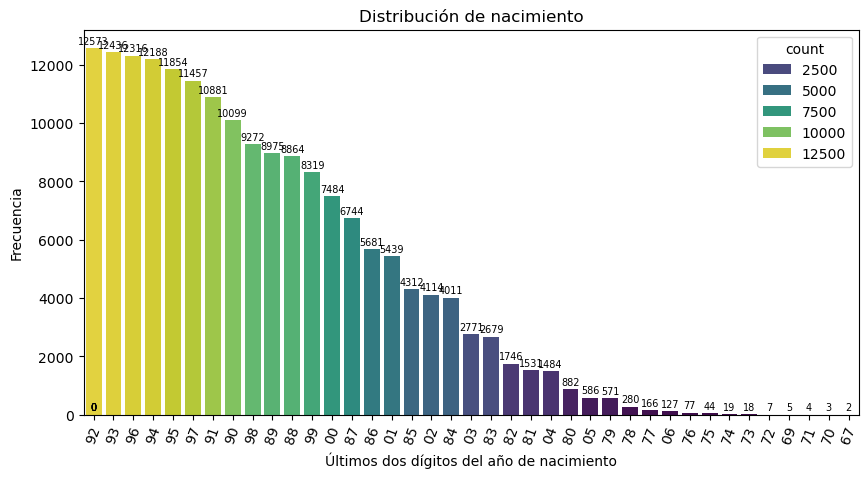

In [42]:
nacimiento_grupo = data['nacimiento'].astype(str).str[-2:]

conteo_nacimientos_grupo = nacimiento_grupo.value_counts()

plt.figure(figsize=(10, 5))
ax = sns.barplot(x=conteo_nacimientos_grupo.index, y=conteo_nacimientos_grupo.values, hue = conteo_nacimientos_grupo, palette = 'viridis')
plt.title("Distribución de nacimiento")
plt.xlabel("Últimos dos dígitos del año de nacimiento")
plt.ylabel("Frecuencia")
plt.xticks(rotation=70)

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 5), textcoords='offset points',size=7)

plt.show()

In [43]:
#Observacion exploratoria:

#La mayoría de los juagdores son de los noventa, seguido por los jugadores mas jovenes que son nacidos en los dos mil 
#y por ultimo,jugadores nacidos en los ochenta; existen grupos pequeños de jugadores nacidos en los setenta y otro de los sesenta

## Posiciones

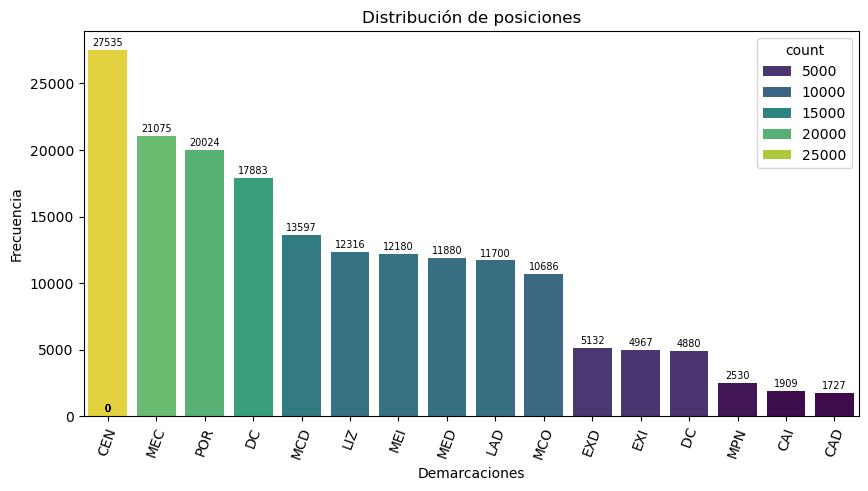

In [44]:
posiciones_agrupadas = data['posiciones'].astype(str).str[-3:]

conteo_posiciones_agrupadas = posiciones_agrupadas.value_counts()

plt.figure(figsize=(10, 5))
ax = sns.barplot(x=conteo_posiciones_agrupadas.index, y=conteo_posiciones_agrupadas.values, hue = conteo_posiciones_agrupadas, palette = 'viridis')
plt.title("Distribución de posiciones")
plt.xlabel("Demarcaciones")
plt.ylabel("Frecuencia")
plt.xticks(rotation=70)

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 5), textcoords='offset points',size=7)

plt.show()

In [45]:
#Observacion exploratoria:
#La posicion en la que hay mas jugadores son los centrales y en general,
#predominan las posiciones defensivas

## Nacionalidad

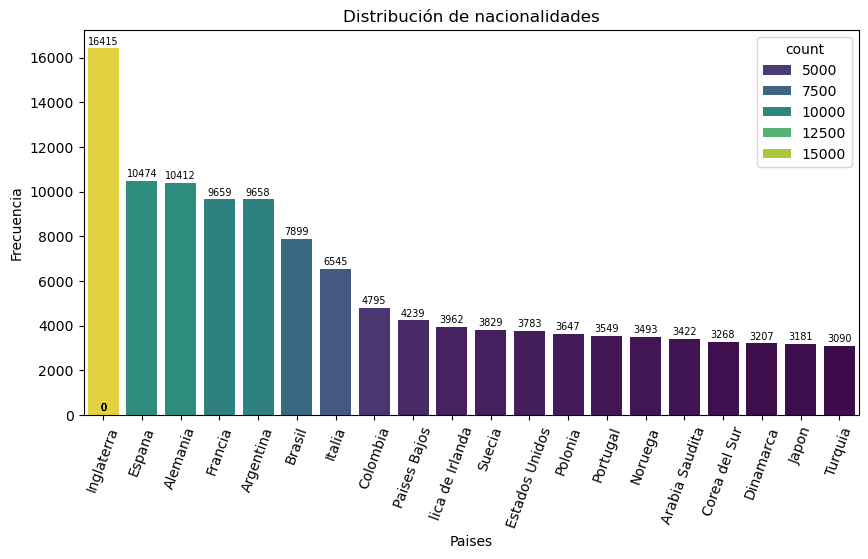

In [46]:
nacionalidades_agrupadas = data['nacionalidad'].astype(str).str[-15:]

conteo_nacionalidades_agrupadas = nacionalidades_agrupadas.value_counts().head(20)

plt.figure(figsize=(10, 5))
ax = sns.barplot(x=conteo_nacionalidades_agrupadas.index, y=conteo_nacionalidades_agrupadas.values, hue = conteo_nacionalidades_agrupadas, palette = 'viridis')
plt.title("Distribución de nacionalidades")
plt.xlabel("Paises")
plt.ylabel("Frecuencia")
plt.xticks(rotation=70)

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 5), textcoords='offset points',size=7)

plt.show()

In [47]:
# Observacion exploratoria:
# La nacionalidad con una mayor representacion es la inglesa, seguida de la española,
# la alemana, francesa, argentina y brasileña.
# La mayoria de este top 20 de nacionalidades son de origen europeo

## Lateralidad

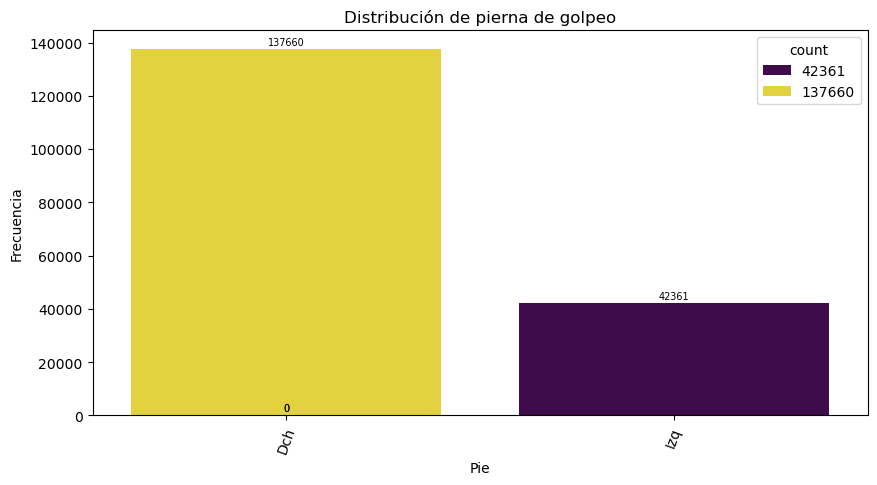

In [48]:
nacionalidades_agrupadas = data['pierna'].astype(str).str[-15:]

conteo_nacionalidades_agrupadas = nacionalidades_agrupadas.value_counts().head(20)

plt.figure(figsize=(10, 5))
ax = sns.barplot(x=conteo_nacionalidades_agrupadas.index, y=conteo_nacionalidades_agrupadas.values, hue = conteo_nacionalidades_agrupadas, palette = 'viridis')
plt.title("Distribución de pierna de golpeo")
plt.xlabel("Pie")
plt.ylabel("Frecuencia")
plt.xticks(rotation=70)

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 5), textcoords='offset points',size=7)

plt.show()

In [49]:
# Observacion exploratoria:
# Dominan los jugadores diestros

# Observaciones explotarias generales

1. posiciones: Mayoría jugadores no polivalentes. Mas centales unicos que porteros
2. nacionalidad: Mayoria de los jugadores son Ingleses 
3. pierna: Mayoria diestros
5. nacion_liga: La mayoria de los clubes juegan en la premier league
6. nacionalidad: Misma tendencia nacionalidad (Ingleses)
7. est_general: La mas común es 64 con 11.002 jugadores, el valor mas alto de 94 con 6 jugadores. MUCHA diferencia
8. valor_de_mercado: valor mas común es 1.1M, el mayor valor es 194M es Mbappe
9. edad: La mayoria tiene 22
10. ritmo: Mas común 67 con 6.8K, mayor ritmo es 97, solo por 4 jugadores
11. chut: Mas común 60 con 4.9K, mayor ritmo es 94, Cristiano Ronaldo
12. pase:Mas común 59 con 6.5K, mayor ritmo es 94, Kevin De Bruyne
13. regate: Mas común 65
14. defensa_x: Mas comun 63
15. fisico: Mas comun 71 
-. altura: Mas comun 1.80m, el mas alto es Kristof Van Hout con 2.08m

In [50]:
datas.head()

,id_jugador,nombre_jugador,version_x,posiciones,est_general_x,valor_de_mercado,salario_semanal,edad,nacimiento,altura,...,id_liga_y,nombre_liga_y,id_nacionalidad_y,nacion_liga,est_general_y,ataque,mediocampo,defensa_y,promedio_edad_titulares,promedio_edad_equipo
0,2,Giovanni Pasquale,2015,MEI,68,675000,9000,32,05 01 1982,181,...,31,serie a,27,italia,74,75,72,74,26.18,24.97
1,2,Giovanni Pasquale,2015,MEI,68,675000,9000,32,05 01 1982,181,...,31,serie a,27,italia,75,77,74,76,27.45,25.00
2,2,Giovanni Pasquale,2015,MEI,68,675000,9000,32,05 01 1982,181,...,31,serie a,27,italia,76,77,76,76,26.55,24.69
3,2,Giovanni Pasquale,2015,MEI,68,675000,9000,32,05 01 1982,181,...,31,serie a,27,italia,74,73,75,75,25.73,23.88
4,2,Giovanni Pasquale,2015,MEI,68,675000,9000,32,05 01 1982,181,...,31,serie a,27,italia,74,76,75,72,25.36,24.09


In [51]:
datas.to_csv('datas.csv', index=False)